# Домашнее задание к занятию:

# «Классификация: Логистическая регрессия и SVM»
____________

## Изучение выборки (первичный анализ)

_В рамках выполнения задания был получен файл: `adult.csv`, для дальнейшей работы с данными, которые содержатся в данном файле проведем его чтение средствами библиотеки `pandas` для сохранения данных в виде датафрейма_

In [4]:
#импортируем в проект библиотеку Pandas
import pandas as pd

In [5]:
#прочтем исходный файл adult.csv
adultdataf = pd.read_csv('adult.csv')

_Проведем предварительное исследование колличества наблюдений относящихся к классам, которые определены в  `income`, для чего построим примитивный столбчатый график_

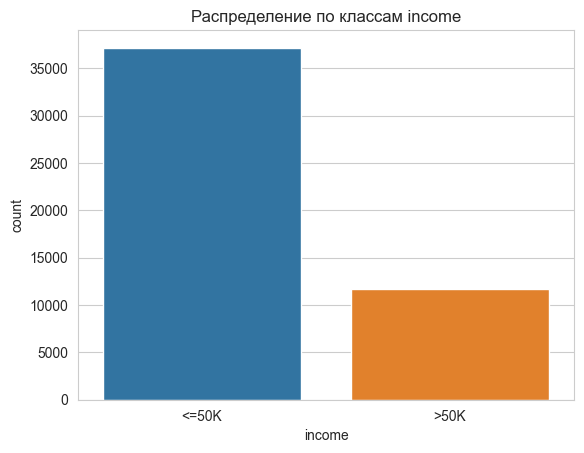

In [6]:
import seaborn as sb
sb.set_style('whitegrid')# определяем стиль отображения

import matplotlib.pyplot as plt

#создаем новый датафрейм для удобства работы
vision = pd.DataFrame()
vision['income'] = adultdataf['income']

#вносим данные для построения столбчатого графика
sb.countplot(x='income', data=vision)

#титул
plt.title('Распределение по классам income')

#выводим
plt.show()

_Как видно из данного графика выборка содержит более 35 тыс. наблюдений, которые относятся к классу `<=50K`, и более 10 тыс. наблюдений относящихся к классу `>50K`.
Для перепроверки правильности построенного графика предлагаю также провести счет колличества наблюдений средствами  языка._

In [7]:
i = 0
j = 0
o = 0

while i < len(vision):
    if vision['income'][i] == '<=50K':
        j = j + 1
    elif vision['income'][i] == '>50K':
        o = o + 1
    i = i + 1

print ('Колличество наблюдений относящихся к \'<=50\' = ', j, '\n')
print ('Колличество наблюдений относящихся к \'>50\' = ', o)
        

Колличество наблюдений относящихся к '<=50' =  37155 

Колличество наблюдений относящихся к '>50' =  11687


_Таким образом точное колличество наблюдений относящихся к `<=50` состовляет 37155, колличество наблюдений относящихся к `>50` 11687.
Построим кругловую диаграму для представления данных значений в долевом виде._

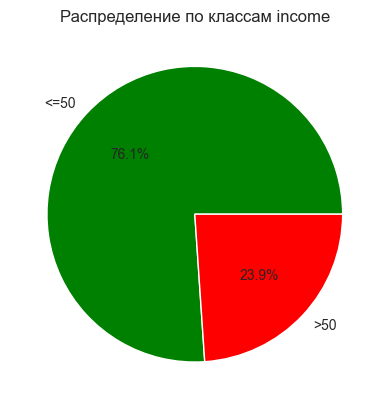

In [8]:
#импортируем numpy для работы с массивом
import numpy as np 

#данные для круговой диаграммы

sizes = np.zeros(2) #создаем массив sizes заполненный нулями
sizes[0] = j #добавляем значение из считалки выше
sizes[1] = o #добавляем значение из считалки выше

labels = ['<=50','>50'] #создаем массив labels

colors = ['green', 'red']  #создаем массив определяющий цвета для каждой категории

#построение круговой диаграммы
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')

#добавление заголовка
plt.title('Распределение по классам income')

#отображение диаграммы
plt.show()

## Проверка данных

_В рамках изучения представленного датасета, обнаружен символ `?`, который не несет смысловой нагрузки в значниях атрибутов конкретного наблюдения, проведем работу по исключению таких наблюдений из датасета._

In [9]:
find_symbol = '?'

#объявим функцию contains_symbol(), которая будет проверять наличие символа в строке хотя бы в одном столбце
def contains_symbol(row):
    #запустим внутри функции цикл который будет повторять проверку каждого значения в строках
    for value in row:
        if isinstance(value, str) and find_symbol in value.lower():  # Ищем символ, игнорируя регистр
            return True
    return False

#применяем функцию contains_symbol() к каждой строке датафрейма, ВАЖНО параметр axis = 1 позволяет применять функцию построчно
mask = adultdataf.apply(contains_symbol, axis=1) #таким образом получаем маску датафрейма, которая содержит TRUE/FALSE на каждую ячейку ВАЖНО TRUE используется что бы удалить

#фильтруем датафрейм по маске, символ ~ перед переменной mask инвертирует булеву маску
adultdataf_filtered = adultdataf[~mask]

In [10]:
# adultdataf_filtered.to_csv('11.csv', index=False)

_Произведем пересчет колличества наблюдений относящихся к классам `income`. Однако изменим написание кода заменив цикл `while` на `for`._

In [11]:
q = 0
w = 0
e = 0

for value in adultdataf_filtered['income']:
    if value == '<=50K':
        w += 1
    elif value == '>50K':
        e += 1

print ('Колличество наблюдений относящихся к \'<=50\' = ', w, '\n')

print ('Колличество наблюдений относящихся к \'>50\' = ', e)
        

Колличество наблюдений относящихся к '<=50' =  34014 

Колличество наблюдений относящихся к '>50' =  11208


In [12]:
print ('Итого по классу \'<=50\' отсеяно наблюдений = ', j - w, '\n')

print ('Итого по классу \'>50\' отсеяно наблюдений = ', o - e, '\n')

Итого по классу '<=50' отсеяно наблюдений =  3141 

Итого по классу '>50' отсеяно наблюдений =  479 



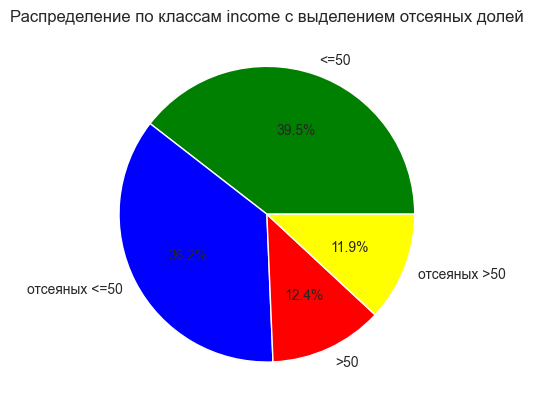

In [13]:
#данные для круговой диаграммы
sizes_f = np.zeros(4)
sizes_f[0] = j
sizes_f[1] = w
sizes_f[2] = o
sizes_f[3] = e

labels = ['<=50', 'отсеяных <=50', '>50', 'отсеяных >50']

colors = ['green', 'blue', 'red', 'yellow']

#построение круговой диаграммы
plt.pie(sizes_f, labels=labels, colors=colors, autopct='%1.1f%%')

#добавление заголовка
plt.title('Распределение по классам income с выделением отсеяных долей')

#отображение диаграммы
plt.show()

## Преобразование категориальных признаков

_Дальнейшее исследование датасета показало наличие категориальных признаков, в рамках выполнения домашнего задания необходимо преобразовать данные признаки, для чего воспользуемся Ordinal Encoding и Label Encoding._ 

In [14]:
from sklearn.preprocessing import LabelEncoder

df_fil_en = adultdataf_filtered.copy()

#Ordinal Encoding
#создаем словари сопоставления для категориальных признаков
mapping_dict_workclass = {'Federal-gov': 0, 'Local-gov': 1, 'Never-worked': 2, 'Private': 3, 'Self-emp-inc': 4, 'Self-emp-not-inc': 5, 'State-gov': 6, 'Without-pay': 7}
mapping_dict_education = {'10th': 0, '11th': 1, '12th': 2, '1st-4th': 3, '5th-6th': 4, '7th-8th': 5, '9th': 6, 'Assoc-acdm': 7, 'Assoc-voc': 8, 'Bachelors': 9, 'Doctorate': 10, 'HS-grad': 11, 'Masters': 12, 'Preschool': 13, 'Prof-school': 14, 'Some-college': 15}
mapping_dict_marital_status = {'Divorced': 0, 'Married-AF-spouse': 1, 'Married-civ-spouse': 2, 'Married-spouse-absent': 3, 'Never-married': 4, 'Separated': 5, 'Widowed': 6}
mapping_dict_occupation = {'Adm-clerical': 0, 'Armed-Forces': 1, 'Craft-repair': 2, 'Exec-managerial': 3, 'Farming-fishing': 4, 'Handlers-cleaners': 5, 'Machine-op-inspct': 6, 'Other-service': 7, 'Priv-house-serv': 8, 'Prof-specialty': 9, 'Protective-serv': 10, 'Sales': 11, 'Tech-support': 12, 'Transport-moving': 13}
mapping_dict_relationship = {'Husband': 0, 'Not-in-family': 1, 'Other-relative': 2, 'Own-child': 3, 'Unmarried': 4, 'Wife': 5}
mapping_dict_race = {'Amer-Indian-Eskimo': 0, 'Asian-Pac-Islander': 1, 'Black': 2, 'Other': 3, 'White': 4}
mapping_dict_gender = {'Male': 0, 'Female': 1}
#применяем метод map, который на основе созданных словарей произведет замену категорий на их числовые обозначени
df_fil_en['workclass'] = df_fil_en['workclass'].map(mapping_dict_workclass)
df_fil_en['education'] = df_fil_en['education'].map(mapping_dict_education)
df_fil_en['marital-status'] = df_fil_en['marital-status'].map(mapping_dict_marital_status)
df_fil_en['occupation'] = df_fil_en['occupation'].map(mapping_dict_occupation)
df_fil_en['relationship'] = df_fil_en['relationship'].map(mapping_dict_relationship)
df_fil_en['race'] = df_fil_en['race'].map(mapping_dict_race)
df_fil_en['gender'] = df_fil_en['gender'].map(mapping_dict_gender)

#Label Encoding
#для чего создаем объект LabelEncoder, который нужен для использования методов класса LabelEncoder
label_encoder = LabelEncoder()
#применяем метод fit_transform, который ищет уникальные категории, сохраняет их в объекте и затем заменяет категории на числовые значения
df_fil_en['native-country'] = label_encoder.fit_transform(df_fil_en['native-country'])
df_fil_en['income'] = label_encoder.fit_transform(df_fil_en['income'])

_В датасете также присутствуют числовые признаки, проведем их преобразование путем применения линейной нормировки_

In [15]:
df_fil_en['age'] = (df_fil_en['age'] - min(df_fil_en['age'])) / (max(df_fil_en['age']) - min(df_fil_en['age']))
df_fil_en['fnlwgt'] = (df_fil_en['fnlwgt'] - min(df_fil_en['fnlwgt'])) / (max(df_fil_en['fnlwgt']) - min(df_fil_en['fnlwgt']))
df_fil_en['educational-num'] = (df_fil_en['educational-num'] - min(df_fil_en['educational-num'])) / (max(df_fil_en['educational-num']) - min(df_fil_en['educational-num']))
df_fil_en['capital-gain'] = (df_fil_en['capital-gain'] - min(df_fil_en['capital-gain'])) / (max(df_fil_en['capital-gain']) - min(df_fil_en['capital-gain']))
df_fil_en['capital-loss'] = (df_fil_en['capital-loss'] - min(df_fil_en['capital-loss'])) / (max(df_fil_en['capital-loss']) - min(df_fil_en['capital-loss']))
df_fil_en['hours-per-week'] = (df_fil_en['hours-per-week'] - min(df_fil_en['hours-per-week'])) / (max(df_fil_en['hours-per-week']) - min(df_fil_en['hours-per-week']))


## Деление выборки

_Проведем деление выборки в соотношении 80% данных оставить на обучающее множество, 20% на тестовое. В рамках решения задачи по разделению выборки на подмножества предлагаю воспользоваться функцией `train_test_split`._

In [16]:
#импортируем в проект заявленную функцию
from sklearn.model_selection import train_test_split

#извлечение признаков X (все столбцы, кроме 'income')
X = df_fil_en.drop('income', axis=1)  # axis=1 указывает на столбцы
#извлечение целевой переменной y (столбец 'income')
y = df_fil_en['income']

#далее воспользуемся заявленной функцией
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#где
#X_train, X_test - обучающее и тестовое подмножества признаков
#y_train, y_test - соответствующие им целевые переменные
#test_size = 0.2 указывает, что 20% данных будет отведено под тестовое множество
#random_state = 42 устанавливает начальное значение для генератора случайных чисел, что обеспечивает воспроизводимость разделения данных


_Проведем простейшую проверку, что тестовая выборка действительно содержит 20% от общего массива:_

In [17]:
t = 0
for value in y_test:
    t = t + 1
print (t)

9045


_Таким образом колличество наблюдений в тестовой выборке - 9045 что от общего числа 45222 составляет 20%_

# Логистическая регрессия

Итак, для дальнейшей работы дадим определение понятия логистическая регрессия. __Логистическая регрессия__ - это статистический метод, используемый для моделирования зависимости между независимыми переменными (признаками) и зависимой переменной, которая принимает бинарные значения (обычно 0 и 1). Она относится к классу обобщенных линейных моделей.

Основная идея логистической регрессии заключается в том, чтобы применить логистическую функцию (также известную как сигмоидная функция) к линейной комбинации признаков. Это позволяет предсказывать вероятность принадлежности наблюдения к определенному классу.

Процесс обучения логистической регрессии заключается в нахождении оптимальных значений параметров модели, которые минимизируют функцию потерь (обычно используется логарифмическая функция потерь). Для этого обычно применяются методы оптимизации, такие как градиентный спуск.

Логистическая регрессия __широко используется в задачах классификации__, где требуется предсказать, к какому классу относится наблюдение на основе заданных признаков.

__Проведем обучение модели LogisticRegression, для обеспечения возможности классификации новых данных, для чего напишем следующий код:__

In [18]:
from sklearn.linear_model import LogisticRegression # импортируем саму модель

#инициализируем модель
model = LogisticRegression(random_state=2019, solver='liblinear')

#обучаем модель на полученных тренировочных данных и столбце с откликами
model.fit(X_train, y_train)

LogisticRegression(random_state=2019, solver='liblinear')

Перед выполнением задачи классификации, проведем оценку средней точности модели. Воспользуемся тестовой выборкой не относящейся к интервалу на котором проводили обучение модели. 

__Для чего напишем следующий код:__

In [19]:
#проводим рассчет точности модели
training_accuracy = model.score(X_test, y_test)

print (training_accuracy)

0.8214483139856275


_Полученное значение свидетельствует о достаточной точности обученной модели. Предскажем на тестовой выборке значения `y`:_

In [20]:
y_pred = model.predict(X_test)

_Проведем проверку результатов работы модели с использованием функции `accuracy_score`:_

In [21]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

print (f'Точность предсказаний модели: {accuracy:.2f}')

Точность предсказаний модели: 0.82


## Опорные вектора

_Метод опорных векторов (Support Vector Machine, SVM) — это алгоритм машинного обучения, который используется как для задач классификации, так и для регрессии. Основная идея SVM заключается в поиске оптимальной гиперплоскости, которая лучше всего разделяет данные разных классов или предсказывает целевую переменную._

In [27]:
from sklearn.svm import SVC

#cоздаем модель SVM
svm_model = SVC(kernel='linear', C=1.0, random_state=42)

#обучаем модель на обучающем множестве
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [28]:
#предсказываем метки классов на тестовом множестве
y_pred = svm_model.predict(X_test)

#оцениваем точность модели
accuracy = accuracy_score(y_test, y_pred)
print(f'Точность SVM на тестовом множестве: {accuracy:.2f}')

Точность SVM на тестовом множестве: 0.81


## Итог

_В рамках выполнения итоговой работы было выполненно следующее:_
1. Прочтен предоставленный файл с датасетом, данные перемещены в датафрейм
2. Проведен предварительный анализ данных
3. Проведена предварительная визуализация полученной выборки в контексте ее деления по столбцу income
4. Проведена линейная нормировка числовых данных, а также преобразование категориальных данных
5. Полученная преобразованная выборка была разделена на тестовое и обучающее множество
6. Проведено обучение модели логистической регрессии
7. Оценена точность обученной модели логистической регрессии
8. Проведено обучение модели SVM
9. Проведена оценка точности модели SVM

_Вывод: 1) в проведенной работе удалось провести обучение двух моделей: логистическая регрессия и SVM, с точностью 0,82 и 0,81 соответственно. 2) результат оценки точности показывает что в ходе обучения моделей их точность является достаточной для использования в рамках построения дальнейших прогнозов по предоставленному датасету_